In [1]:
import sys
sys.path.append("..")
import os
import numpy as np
from RadCloud.Analyzer import Analyzer
from RadCloud.datasets.Dataset_Generator import DatasetGenerator
from torchvision import transforms

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
dataset_folder = "../data"

#list the scenarios for all datasets
ugv_seen_train_scenarios = ["scene_{}".format(i+1) for i in range(7)]
ugv_seen_test_scenarios = ["scene_{}_test".format(i+1) for i in range(7)]
ugv_unseen_test_scenarios = ["scene_{}".format(i+1) for i in range(7)]
ugv_rapid_movement_test_scenarios = ["scene_{}_test_spin".format(i) for i in range(3,5)]

#generate the full path to each dataset
ugv_seen_train_scenarios = [os.path.join(
    dataset_folder,"ugv_seen_dataset",scenario_folder) for 
    scenario_folder in ugv_seen_train_scenarios]
ugv_seen_test_scenarios = [os.path.join(
    dataset_folder,"ugv_seen_dataset",scenario_folder) for 
    scenario_folder in ugv_seen_test_scenarios]
ugv_unseen_test_scenarios = [os.path.join(
    dataset_folder,"ugv_unseen_dataset",scenario_folder) for 
    scenario_folder in ugv_unseen_test_scenarios]
ugv_rapid_movement_test_scenarios = [os.path.join(
    dataset_folder,"ugv_rapid_movement_dataset",scenario_folder) for 
    scenario_folder in ugv_rapid_movement_test_scenarios]

In [3]:
#select which scenario to generate the dataset from
scenarios_to_use = ugv_seen_test_scenarios

#location that we wish to save the dataset to
generated_dataset_path = "../data/test/"

#specifying the names for the files
generated_file_name = "frame"
radar_data_folder = "radar"
lidar_data_folder = "lidar"

#basic dataset settings
num_chirps_to_save = 40
num_previous_frames = 0

In [4]:
#initialize the DatasetGenerator
dataset_generator = DatasetGenerator()

dataset_generator.config_generated_dataset_paths(
    generated_dataset_path=generated_dataset_path,
    generated_file_name=generated_file_name,
    generated_radar_data_folder=radar_data_folder,
    generated_lidar_data_folder=lidar_data_folder,
    clear_existing_data=True
)

#configure the lidar data processor
dataset_generator.config_radar_lidar_data_paths(
    scenario_folder= scenarios_to_use[0],
    radar_data_folder=radar_data_folder,
    lidar_data_folder=lidar_data_folder
)

DatasetGenerator._check_for_directory: found directory ../data/test/
DatasetGenerator._check_for_directory: found directory ../data/test/radar
DatasetGenerator._check_for_directory: clearing contents of ../data/test/radar
DatasetGenerator._check_for_directory: found directory ../data/test/lidar
DatasetGenerator._check_for_directory: clearing contents of ../data/test/lidar
DatasetGenerator.config_radar_lidar_data_paths: found 938 samples


In [5]:
#configure the radar data processor
dataset_generator.config_radar_data_processor(
    max_range_bin=64,
    num_chirps_to_save=num_chirps_to_save,
    num_previous_frames=num_previous_frames,
    radar_fov= [-0.87, 0.87], #+/- 50 degrees
    num_angle_bins=64,
    power_range_dB=[60,105],
    chirps_per_frame= 64,
    rx_channels = 4,
    tx_channels = 1,
    samples_per_chirp = 64,
    adc_sample_rate_Hz = 2e6,
    chirp_slope_MHz_us= 35,
    start_freq_Hz=77e9,
    idle_time_us = 100,
    ramp_end_time_us = 100
)

#configure the lidar data processor
dataset_generator.config_lidar_data_processor(
    max_range_m=8.56,
    num_range_bins=64,
    angle_range_rad=[-np.pi/2 - 0.87,-np.pi/2 + 0.87], #[-np.pi /2 , np.pi /2],
    num_angle_bins=48,
    num_previous_frames=num_previous_frames
)

max range: 8.5654988m
num actual angle bins: 48


In [6]:
dataset_generator.generate_dataset_from_multiple_scenarios(
    scenario_folders = scenarios_to_use,
    radar_data_folder= radar_data_folder,
    lidar_data_folder=lidar_data_folder
)



DatasetGenerator.generate_dataset_from_multiple_scenarios: generating dataset from scenario 1 of 7: ../data/ugv_seen_dataset/scene_1_test
DatasetGenerator.config_radar_lidar_data_paths: found 938 samples
DatasetGenerator.generate_dataset: Generating radar dataset
RadarDataProcessor._check_save_directory: found directory ../data/test/radar
RadarDataProcessor._check_save_directory: clearing contents of ../data/test/radar


100%|██████████| 938/938 [00:03<00:00, 305.39it/s]


DatasetGenerator.generate_dataset: Generating Lidar Dataset
LidarDataProcessor._check_save_directory: found directory ../data/test/lidar
LidarDataProcessor._check_save_directory: clearing contents of ../data/test/lidar


100%|██████████| 938/938 [00:08<00:00, 104.37it/s]




DatasetGenerator.generate_dataset_from_multiple_scenarios: generating dataset from scenario 2 of 7: ../data/ugv_seen_dataset/scene_2_test
DatasetGenerator.config_radar_lidar_data_paths: found 2364 samples
DatasetGenerator.generate_dataset: Generating radar dataset
RadarDataProcessor._check_save_directory: found directory ../data/test/radar
RadarDataProcessor._check_save_directory: detected existing samples, starting on sample 937


100%|██████████| 2364/2364 [00:07<00:00, 303.03it/s]


DatasetGenerator.generate_dataset: Generating Lidar Dataset
LidarDataProcessor._check_save_directory: found directory ../data/test/lidar
LidarDataProcessor._check_save_directory: detected existing samples, starting on sample 937


100%|██████████| 2364/2364 [00:21<00:00, 110.36it/s]




DatasetGenerator.generate_dataset_from_multiple_scenarios: generating dataset from scenario 3 of 7: ../data/ugv_seen_dataset/scene_3_test
DatasetGenerator.config_radar_lidar_data_paths: found 1204 samples
DatasetGenerator.generate_dataset: Generating radar dataset
RadarDataProcessor._check_save_directory: found directory ../data/test/radar
RadarDataProcessor._check_save_directory: detected existing samples, starting on sample 3300


100%|██████████| 1204/1204 [00:03<00:00, 314.36it/s]


DatasetGenerator.generate_dataset: Generating Lidar Dataset
LidarDataProcessor._check_save_directory: found directory ../data/test/lidar
LidarDataProcessor._check_save_directory: detected existing samples, starting on sample 3300


100%|██████████| 1204/1204 [00:10<00:00, 113.14it/s]




DatasetGenerator.generate_dataset_from_multiple_scenarios: generating dataset from scenario 4 of 7: ../data/ugv_seen_dataset/scene_4_test
DatasetGenerator.config_radar_lidar_data_paths: found 1289 samples
DatasetGenerator.generate_dataset: Generating radar dataset
RadarDataProcessor._check_save_directory: found directory ../data/test/radar
RadarDataProcessor._check_save_directory: detected existing samples, starting on sample 4503


100%|██████████| 1289/1289 [00:04<00:00, 314.09it/s]


DatasetGenerator.generate_dataset: Generating Lidar Dataset
LidarDataProcessor._check_save_directory: found directory ../data/test/lidar
LidarDataProcessor._check_save_directory: detected existing samples, starting on sample 4503


100%|██████████| 1289/1289 [00:11<00:00, 114.88it/s]




DatasetGenerator.generate_dataset_from_multiple_scenarios: generating dataset from scenario 5 of 7: ../data/ugv_seen_dataset/scene_5_test
DatasetGenerator.config_radar_lidar_data_paths: found 1159 samples
DatasetGenerator.generate_dataset: Generating radar dataset
RadarDataProcessor._check_save_directory: found directory ../data/test/radar
RadarDataProcessor._check_save_directory: detected existing samples, starting on sample 5791


100%|██████████| 1159/1159 [00:03<00:00, 312.02it/s]


DatasetGenerator.generate_dataset: Generating Lidar Dataset
LidarDataProcessor._check_save_directory: found directory ../data/test/lidar
LidarDataProcessor._check_save_directory: detected existing samples, starting on sample 5791


100%|██████████| 1159/1159 [00:10<00:00, 114.16it/s]




DatasetGenerator.generate_dataset_from_multiple_scenarios: generating dataset from scenario 6 of 7: ../data/ugv_seen_dataset/scene_6_test
DatasetGenerator.config_radar_lidar_data_paths: found 1273 samples
DatasetGenerator.generate_dataset: Generating radar dataset
RadarDataProcessor._check_save_directory: found directory ../data/test/radar
RadarDataProcessor._check_save_directory: detected existing samples, starting on sample 6949


100%|██████████| 1273/1273 [00:04<00:00, 310.40it/s]


DatasetGenerator.generate_dataset: Generating Lidar Dataset
LidarDataProcessor._check_save_directory: found directory ../data/test/lidar
LidarDataProcessor._check_save_directory: detected existing samples, starting on sample 6949


100%|██████████| 1273/1273 [00:11<00:00, 112.48it/s]




DatasetGenerator.generate_dataset_from_multiple_scenarios: generating dataset from scenario 7 of 7: ../data/ugv_seen_dataset/scene_7_test
DatasetGenerator.config_radar_lidar_data_paths: found 891 samples
DatasetGenerator.generate_dataset: Generating radar dataset
RadarDataProcessor._check_save_directory: found directory ../data/test/radar
RadarDataProcessor._check_save_directory: detected existing samples, starting on sample 8221


100%|██████████| 891/891 [00:02<00:00, 309.52it/s]


DatasetGenerator.generate_dataset: Generating Lidar Dataset
LidarDataProcessor._check_save_directory: found directory ../data/test/lidar
LidarDataProcessor._check_save_directory: detected existing samples, starting on sample 8221


100%|██████████| 891/891 [00:07<00:00, 114.41it/s]


In [7]:
from RadCloud.models.unet import unet

#initialize the transforms
unet_transforms = [
    transforms.ToTensor(),
    transforms.Resize((64,48))
]

#initialize the unet
unet_model = unet(
    encoder_input_channels= 40,
    encoder_out_channels= (64,128,256),
    decoder_input_channels= (512,256,128),
    decoder_out_channels= 64,
    output_channels= 1,
    retain_dimmension= False,
    input_dimmensions= (64,48)
)

#initialize the viewer
result_analyzer = Analyzer(
    dataset_generator=dataset_generator,
    model=unet_model,
    transforms_to_apply= unet_transforms,
    working_dir="../working_dir/",
    model_state_dict_file_name="RadCloud_40_chirps_10e.pth",
    cuda_device="cuda:0"
)

Analyzer.__init__: using GPU: cuda:0


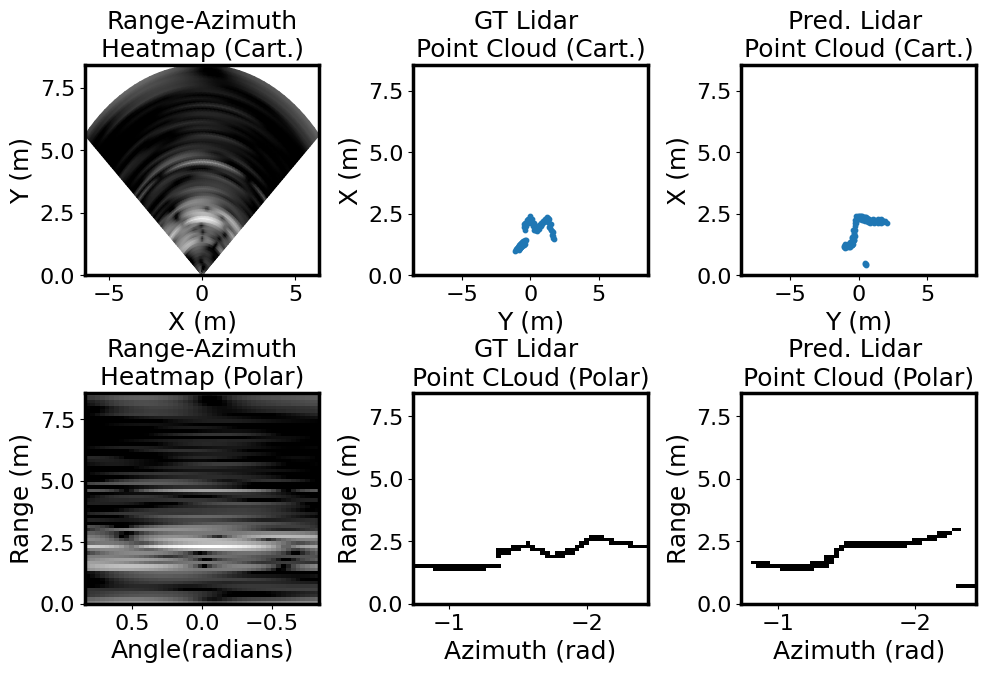

In [8]:
#show the results for a given sample
result_analyzer.view_result(sample_idx=200)

In [9]:
#to assess the speed of model computations
result_analyzer.compute_all_results(
    scenario_folders=scenarios_to_use,
    radar_data_folder=radar_data_folder,
    lidar_data_folder=lidar_data_folder
)


\Analyzer.compute_all_results: scenario 1 of 7: ../data/ugv_seen_dataset/scene_1_test
DatasetGenerator.config_radar_lidar_data_paths: found 938 samples


100%|██████████| 938/938 [00:03<00:00, 250.06it/s]



\Analyzer.compute_all_results: scenario 2 of 7: ../data/ugv_seen_dataset/scene_2_test
DatasetGenerator.config_radar_lidar_data_paths: found 2364 samples


100%|██████████| 2364/2364 [00:09<00:00, 253.78it/s]



\Analyzer.compute_all_results: scenario 3 of 7: ../data/ugv_seen_dataset/scene_3_test
DatasetGenerator.config_radar_lidar_data_paths: found 1204 samples


100%|██████████| 1204/1204 [00:05<00:00, 237.63it/s]



\Analyzer.compute_all_results: scenario 4 of 7: ../data/ugv_seen_dataset/scene_4_test
DatasetGenerator.config_radar_lidar_data_paths: found 1289 samples


100%|██████████| 1289/1289 [00:05<00:00, 248.50it/s]



\Analyzer.compute_all_results: scenario 5 of 7: ../data/ugv_seen_dataset/scene_5_test
DatasetGenerator.config_radar_lidar_data_paths: found 1159 samples


100%|██████████| 1159/1159 [00:04<00:00, 241.82it/s]



\Analyzer.compute_all_results: scenario 6 of 7: ../data/ugv_seen_dataset/scene_6_test
DatasetGenerator.config_radar_lidar_data_paths: found 1273 samples


100%|██████████| 1273/1273 [00:05<00:00, 251.32it/s]



\Analyzer.compute_all_results: scenario 7 of 7: ../data/ugv_seen_dataset/scene_7_test
DatasetGenerator.config_radar_lidar_data_paths: found 891 samples


100%|██████████| 891/891 [00:03<00:00, 256.24it/s]


In [10]:
#computing all distance metrics
save_distances = False
file_name = "40_frames_radcloud_10e"

chamfer_distances_radCloud, modified_hausdorff_distances_radCloud = \
    result_analyzer.compute_radCloud_distance_metrics(
        save_to_file=save_distances,
        file_name=file_name
    )

Analyzer.compute_all_distance_metrics: Computing distance metrics


100%|██████████| 9112/9112 [00:14<00:00, 625.14it/s]

Analyzer.compute_all_distance_metrics: number failed predictoins 8 of 9112 (0.000877963125548727%)


In [11]:
#to compute summary statistics
result_analyzer.show_radCloud_summary_statistics(chamfer_distances_radCloud, modified_hausdorff_distances_radCloud)

,Metric,Chamfer (radCloud),Modified Hausdorff (radCloud)
0,Mean,0.199539,0.123630
1,Median,0.147699,0.092111
2,90th percentile,0.392545,0.232674


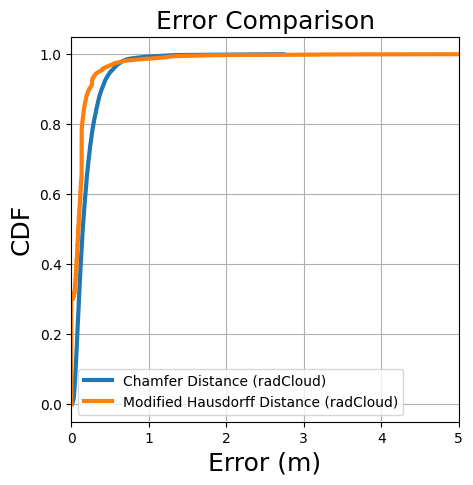

In [13]:
result_analyzer.plot_Radloud_distance_metrics_cdfs(chamfer_distances_radCloud,modified_hausdorff_distances_radCloud)